# Baseline Model with Multi-Layer Perceptrons

In [ ]:
# Baseline MLP for MNIST dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))


11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/10
300/300 - 4s - loss: 0.2782 - accuracy: 0.9208 - val_loss: 0.1389 - val_accuracy: 0.9597
Epoch 2/10
300/300 - 1s - loss: 0.1084 - accuracy: 0.9688 - val_loss: 0.0899 - val_accuracy: 0.9721
Epoch 3/10
300/300 - 1s - loss: 0.0697 - accuracy: 0.9801 - val_loss: 0.0737 - val_accuracy: 0.9771
Epoch 4/10
300/300 - 1s - loss: 0.0508 - accuracy: 0.9853 - val_loss: 0.0698 - val_accuracy: 0.9783
Epoch 5/10
300/300 - 1s - loss: 0.0365 - accuracy: 0.9895 - val_loss: 0.0665 - val_accuracy: 0.9803
Epoch 6/10
300/300 - 1s - loss: 0.0260 - accuracy: 0.9932 - val_loss: 0.0675 - val_accuracy: 0.9788
Epoch 7/10
300/300 - 1s - loss: 0.0197 - accuracy: 0.9950 - val_loss: 0.0646 - val_accuracy: 0.9794
Epoch 8/10
300/300 - 1s - loss: 0.0141 - accuracy: 0.9968 - val_loss: 0.0583 - val_accuracy: 0.9816
Epoch 9/10
300/300 - 1s - loss: 0.0109 - accuracy: 0.9976 - val_loss: 0.0562 - val_accuracy: 0.9816
Epoch 10/10
300/300 - 1s - loss: 0.

# Simple Convolutional Neural Network for MNIST


In [ ]:
# Simple CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define a simple CNN model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))


Epoch 1/10
300/300 [==============================] - 30s 8ms/step - loss: 0.2386 - accuracy: 0.9314 - val_loss: 0.0712 - val_accuracy: 0.9777
Epoch 2/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0732 - accuracy: 0.9781 - val_loss: 0.0498 - val_accuracy: 0.9843
Epoch 3/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0520 - accuracy: 0.9841 - val_loss: 0.0513 - val_accuracy: 0.9835
Epoch 4/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0408 - accuracy: 0.9873 - val_loss: 0.0347 - val_accuracy: 0.9887
Epoch 5/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0337 - accuracy: 0.9895 - val_loss: 0.0353 - val_accuracy: 0.9882
Epoch 6/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.0318 - val_accuracy: 0.9886
Epoch 7/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0219 - accuracy: 0.9933 - val_loss: 0.0334 - val_accuracy: 0.9898
Epoch

# Larger Convolutional Neural Network for MNIST


In [ ]:
# Larger CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define the larger model
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))


Epoch 1/10
300/300 [==============================] - 5s 14ms/step - loss: 0.3678 - accuracy: 0.8843 - val_loss: 0.0751 - val_accuracy: 0.9758
Epoch 2/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0935 - accuracy: 0.9710 - val_loss: 0.0480 - val_accuracy: 0.9847
Epoch 3/10
300/300 [==============================] - 3s 12ms/step - loss: 0.0700 - accuracy: 0.9786 - val_loss: 0.0391 - val_accuracy: 0.9875
Epoch 4/10
300/300 [==============================] - 3s 11ms/step - loss: 0.0577 - accuracy: 0.9815 - val_loss: 0.0311 - val_accuracy: 0.9897
Epoch 5/10
300/300 [==============================] - 3s 11ms/step - loss: 0.0478 - accuracy: 0.9845 - val_loss: 0.0326 - val_accuracy: 0.9895
Epoch 6/10
300/300 [==============================] - 3s 11ms/step - loss: 0.0429 - accuracy: 0.9867 - val_loss: 0.0279 - val_accuracy: 0.9901
Epoch 7/10
300/300 [==============================] - 3s 11ms/step - loss: 0.0381 - accuracy: 0.9879 - val_loss: 0.0259 - val_accuracy: 0.9911

# Mnist +  AZ Kaggle

## Import Libraries

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
# set the matplotlib backend so figures can be saved in the background
import cv2
import argparse
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# import the necessary packages
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
import numpy as np
import argparse
import imutils
import cv2

from google.colab.patches import cv2_imshow

# from typing_extensions import Required
import matplotlib
matplotlib.use("Agg")
# import the necessary packages

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import add
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip '/content/drive/MyDrive/Programming/Python Projects/OCR Model/A_Z Handwritten Data.csv.zip'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/Programming/Python Projects/OCR Model/A_Z Handwritten Data.csv.zip
replace A_Z Handwritten Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Load Dataset

In [ ]:
def load_az_dataset(dataset_path):
    # initialize the list of data and labels
    data = []
    labels = []

    # loop over the rows of the A-Z handwritten digit dataset
    for row in open(dataset_path):
        # parse the label and image from the row
        row = row.split(",")
        label = int(row[0])
        image = np.array([int(x) for x in row[1:]], dtype="uint8")

        # images are represented as single channel (grayscale) images
        # that are 28x28=784 pixels -- we need to take this flattened
        # 784-d list of numbers and reshape them into a 28x28 matrix
        image = image.reshape((28, 28))

        # update the list of data and labels
        data.append(image)
        labels.append(label)

        # convert the data and labels to NumPy arrays
        data = np.array(data, dtype="float32")
        labels = np.array(labels, dtype="int")

        # return a 2-tuple of the A-Z data and labels
        return (data, labels)


def load_zero_nine_dataset():
    # load the MNIST dataset and stack the training data and testing
    # data together (we'll create our own training and testing splits
    # later in the project)
    ((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()
    data = np.vstack([trainData, testData])
    labels = np.hstack([trainLabels, testLabels])
    # return a 2-tuple of the MNIST data and labels
    return (data, labels)


In [ ]:
# load the A-Z and MNIST datasets, respectively
print("[INFO] loading datasets...")

(azData, azLabels) = load_az_dataset('/content/A_Z Handwritten Data.csv')
(digitsData, digitsLabels) = load_zero_nine_dataset()

# the MNIST dataset occupies the labels 0-9, so let's add 10 to every
# A-Z label to ensure the A-Z characters are not incorrectly labeled
# as digits
azLabels += 10


# stack the A-Z data and labels with the MNIST digits data and labels
data = np.vstack([azData, digitsData])
labels = np.hstack([azLabels, digitsLabels])


[INFO] loading datasets...


## Data Pre Processing

In [ ]:
# each image in the A-Z and MNIST digts datasets are 28x28 pixels;
# however, the architecture we're using is designed for 32x32 images,
# so we need to resize them to 32x32
data = [cv2.resize(image, (32, 32)) for image in data]
data = np.array(data, dtype="float32")

# add a channel dimension to every image in the dataset and scale the
# pixel intensities of the images from [0, 255] down to [0, 1]
data = np.expand_dims(data, axis=-1)
data /= 255.0

# convert the labels from integers to vectors
le = LabelBinarizer()

labels = le.fit_transform(labels)
ounts = labels.sum(axis=0)

# account for skew in the labeled data
classTotals = labels.sum(axis=0)
classWeight = {}

# loop over all classes and calculate the class weight
for i in range(0, len(classTotals)):
    classWeight[i] = classTotals.max() / classTotals[i]

# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
                                                  labels, test_size=0.20, stratify=None, random_state=42)

# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=10, zoom_range=0.05, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.15, horizontal_flip=False, fill_mode="nearest")

## Model Compile and Train

In [ ]:
class ResNet:
    @staticmethod
    def residual_module(data, K, stride, chanDim, red=False,
                        reg=0.0001, bnEps=2e-5, bnMom=0.9):
        # the shortcut branch of the ResNet module should be
        # initialize as the input (identity) data
        shortcut = data

        # the first block of the ResNet module are the 1x1 CONVs
        bn1 = BatchNormalization(axis=chanDim, epsilon=bnEps,
                                 momentum=bnMom)(data)
        act1 = Activation("relu")(bn1)
        conv1 = Conv2D(int(K * 0.25), (1, 1), use_bias=False,
                       kernel_regularizer=l2(reg))(act1)

        # the second block of the ResNet module are the 3x3 CONVs
        bn2 = BatchNormalization(axis=chanDim, epsilon=bnEps,
                                 momentum=bnMom)(conv1)
        act2 = Activation("relu")(bn2)
        conv2 = Conv2D(int(K * 0.25), (3, 3), strides=stride,
                       padding="same", use_bias=False,
                       kernel_regularizer=l2(reg))(act2)

        # the third block of the ResNet module is another set of 1x1
        # CONVs
        bn3 = BatchNormalization(axis=chanDim, epsilon=bnEps,
                                 momentum=bnMom)(conv2)
        act3 = Activation("relu")(bn3)
        conv3 = Conv2D(K, (1, 1), use_bias=False,
                       kernel_regularizer=l2(reg))(act3)

        # if we are to reduce the spatial size, apply a CONV layer to
        # the shortcut
        if red:
            shortcut = Conv2D(K, (1, 1), strides=stride,
                              use_bias=False, kernel_regularizer=l2(reg))(act1)

        # add together the shortcut and the final CONV
        x = add([conv3, shortcut])

        # return the addition as the output of the ResNet module
        return x

    @staticmethod
    def build(width, height, depth, classes, stages, filters,
              reg=0.0001, bnEps=2e-5, bnMom=0.9, dataset="cifar"):
        # initialize the input shape to be "channels last" and the
        # channels dimension itself
        inputShape = (height, width, depth)
        chanDim = -1

        # if we are using "channels first", update the input shape
        # and channels dimension
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # set the input and apply BN
        inputs = Input(shape=inputShape)
        x = BatchNormalization(axis=chanDim, epsilon=bnEps,
                               momentum=bnMom)(inputs)

        # check if we are utilizing the CIFAR dataset
        if dataset == "cifar":
            # apply a single CONV layer
            x = Conv2D(filters[0], (3, 3), use_bias=False,
                       padding="same", kernel_regularizer=l2(reg))(x)

        # check to see if we are using the Tiny ImageNet dataset
        elif dataset == "tiny_imagenet":
            # apply CONV => BN => ACT => POOL to reduce spatial size
            x = Conv2D(filters[0], (5, 5), use_bias=False,
                       padding="same", kernel_regularizer=l2(reg))(x)
            x = BatchNormalization(axis=chanDim, epsilon=bnEps,
                                   momentum=bnMom)(x)
            x = Activation("relu")(x)
            x = ZeroPadding2D((1, 1))(x)
            x = MaxPooling2D((3, 3), strides=(2, 2))(x)

        # loop over the number of stages
        for i in range(0, len(stages)):
            # initialize the stride, then apply a residual module
            # used to reduce the spatial size of the input volume
            stride = (1, 1) if i == 0 else (2, 2)
            x = ResNet.residual_module(x, filters[i + 1], stride,
                                       chanDim, red=True, bnEps=bnEps, bnMom=bnMom)

            # loop over the number of layers in the stage
            for j in range(0, stages[i] - 1):
                # apply a ResNet module
                x = ResNet.residual_module(x, filters[i + 1],
                                           (1, 1), chanDim, bnEps=bnEps, bnMom=bnMom)

        # apply BN => ACT => POOL
        x = BatchNormalization(axis=chanDim, epsilon=bnEps,
                               momentum=bnMom)(x)
        x = Activation("relu")(x)
        x = AveragePooling2D((8, 8))(x)

        # softmax classifier
        x = Flatten()(x)
        x = Dense(classes, kernel_regularizer=l2(reg))(x)
        x = Activation("softmax")(x)

        # create the model
        model = Model(inputs, x, name="resnet")

        # return the constructed network architecture
        return model

In [ ]:
# initialize the number of epochs to train for, initial learning rate,
# and batch size
EPOCHS = 50
INIT_LR = 1e-1
BS = 128

# initialize and compile our deep neural network
print("[INFO] compiling model...")

opt = SGD(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model = ResNet.build(32, 32, 1, len(le.classes_), (3, 3, 3),
                     (64, 64, 128, 256), reg=0.0005)
model.compile(loss="categorical_crossentropy",
              optimizer=opt, metrics=["accuracy"])

# train the network
print("[INFO] training network...")

H = model.fit(
    aug.flow(trainX, trainY, batch_size=BS), validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS, epochs=EPOCHS,
    class_weight=classWeight,
    verbose=1)

# define the list of label names
labelNames = "0123456789"
labelNames += "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
labelNames = [l for l in labelNames]

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=BS)
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1), target_names=labelNames))

# save the model to disk
print()
model.save('ocr_model.h5', save_format="h5")

# construct a plot that plots and saves the training history
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Trainning Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])

images = [] 
# randomly select a few testing characters
for i in np.random.choice(np.arange(0, len(testY)), size=(49,)):
    # classify the character
    probs = model.predict(testX[np.newaxis, i])
prediction = probs.argmax(axis=1)
label = labelNames[prediction[0]]

# extract the image from the test data and initialize the text
# label color as green (correct)
image = (testX[i] * 255).astype("uint8")
color = (0, 255, 0)

# otherwise, the class label prediction is incorrect
if prediction[0] != np.argmax(testY[i]):
    color = (0, 0, 255)

# merge the channels into one image, resize the image from 32x32
# to 96x96 so we can better see it and then draw the predicted
# label on the image
image = cv2.merge([image] * 3)
image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75,
color, 2)

# add the image to our list of output images
images.append(image)

# construct the montage for the images
montage = build_montages(images, (96, 96), (7, 7))[0]

# show the output montage
print("OCR Results")
cv2_imshow(montage)


[INFO] compiling model...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[INFO] training network...
Epoch 1/50
186/437 [===========>..................] - ETA: 11:01 - loss: 1.4612 - accuracy: 0.6965

KeyboardInterrupt: ignored

## Model Testing

In [ ]:
# load the handwriting OCR model
print("[INFO] loading handwriting OCR model...")
model = load_model('ocr_model.h5')

# load the input image from disk, convert it to grayscale, and blur
# it to reduce noise
image = cv2.imread('plate.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
edged = cv2.Canny(blurred, 30, 150)
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]

# initialize the list of contour bounding boxes and associated
# characters that we'll be OCR'ing
chars = []

# loop over the contours
for c in cnts:
	# compute the bounding box of the contour
	(x, y, w, h) = cv2.boundingRect(c)

	# filter out bounding boxes, ensuring they are neither too small
	# nor too large
	if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
		# extract the character and threshold it to make the character
		# appear as *white* (foreground) on a *black* background, then
		# grab the width and height of the thresholded image
		roi = gray[y:y + h, x:x + w]
		thresh = cv2.threshold(roi, 0, 255,
			cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
		(tH, tW) = thresh.shape

		# if the width is greater than the height, resize along the
		# width dimension
		if tW > tH:
			thresh = imutils.resize(thresh, width=32)

		# otherwise, resize along the height
		else:
			thresh = imutils.resize(thresh, height=32)

		# re-grab the image dimensions (now that its been resized)
		# and then determine how much we need to pad the width and
		# height such that our image will be 32x32
		(tH, tW) = thresh.shape
		dX = int(max(0, 32 - tW) / 2.0)
		dY = int(max(0, 32 - tH) / 2.0)

		# pad the image and force 32x32 dimensions
		padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY,
			left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
			value=(0, 0, 0))
		padded = cv2.resize(padded, (32, 32))

		# prepare the padded image for classification via our
		# handwriting OCR model
		padded = padded.astype("float32") / 255.0
		padded = np.expand_dims(padded, axis=-1)

		# update our list of characters that will be OCR'd
		chars.append((padded, (x, y, w, h)))

# extract the bounding box locations and padded characters
boxes = [b[1] for b in chars]
chars = np.array([c[0] for c in chars], dtype="float32")

# OCR the characters using our handwriting recognition model
preds = model.predict(chars)

# define the list of label names
labelNames = "0123456789"
labelNames += "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
labelNames = [l for l in labelNames]

# loop over the predictions and bounding box locations together
for (pred, (x, y, w, h)) in zip(preds, boxes):
	# find the index of the label with the largest corresponding
	# probability, then extract the probability and label
	i = np.argmax(pred)
	prob = pred[i]
	label = labelNames[i]

	# draw the prediction on the image
	print("[INFO] {} - {:.2f}%".format(label, prob * 100))
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	cv2.putText(image, label, (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 2)

# show the image
print("Image")
cv2_imshow(image)


[INFO] loading handwriting OCR model...


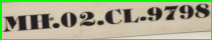

[INFO] 6 - 61.42%
Image


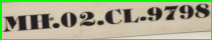

In [ ]:
# load the handwriting OCR model
print("[INFO] loading handwriting OCR model...")
model = load_model('ocr_model.h5')

# load the input image from disk, convert it to grayscale, and blur
# it to reduce noise
image = cv2.imread('plate.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cnts = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]

# initialize the list of contour bounding boxes and associated
# characters that we'll be OCR'ing
chars = []

ima = image.copy()
for c in cnts:
  cv2.rectangle(ima, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2_imshow(ima)

# loop over the contours
for c in cnts:
  (x, y, w, h) = cv2.boundingRect(c)
  roi = gray[y:y + h, x:x + w]
  thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  (tH, tW) = thresh.shape


  (tH, tW) = thresh.shape
  dX = int(max(0, 32 - tW) / 2.0)
  dY = int(max(0, 32 - tH) / 2.0)

  # pad the image and force 32x32 dimensions
  padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY,
    left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
    value=(0, 0, 0))
  padded = cv2.resize(padded, (32, 32))

  # prepare the padded image for classification via our
  # handwriting OCR model
  padded = padded.astype("float32") / 255.0
  padded = np.expand_dims(padded, axis=-1)

  # update our list of characters that will be OCR'd
  chars.append((padded, (x, y, w, h)))

# extract the bounding box locations and padded characters
boxes = [b[1] for b in chars]
chars = np.array([c[0] for c in chars], dtype="float32")

# OCR the characters using our handwriting recognition model
preds = model.predict(chars)

# define the list of label names
labelNames = "0123456789"
labelNames += "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
labelNames = [l for l in labelNames]

# loop over the predictions and bounding box locations together
for (pred, (x, y, w, h)) in zip(preds, boxes):
	# find the index of the label with the largest corresponding
	# probability, then extract the probability and label
	i = np.argmax(pred)
	prob = pred[i]
	label = labelNames[i]

	# draw the prediction on the image
	print("[INFO] {} - {:.2f}%".format(label, prob * 100))
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	cv2.putText(image, label, (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 2)

# show the image
print("Image")
cv2_imshow(image)
